# Industrial Pencillin Simulation Data Export

## Index 

* [Data Processing](#Data-Processing)


Download data and unzip contents to current folder

Addition details [here](http://www.industrialpenicillinsimulation.com/) found at: 

In [1]:
%%html
<a href='http://www.industrialpenicillinsimulation.com/'> IndPenSim Website</a>


In [50]:
%%bash

wget https://data.mendeley.com/datasets/pdnjz7zz5x/1/files/ec0dfb55-7e3c-4124-8b0c-ca8ae7c50fe7/100_Batches_IndPenSim.zip

Couldn't find program: 'bash'


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
import pandas as pd
data = pd.read_csv('100_Batches_IndPenSim_V3.csv') 
data_summary = pd.read_csv('100_Batches_IndPenSim_Statistics.csv') 

In [4]:
data_summary.head()

,Batch ref,Penicllin_harvested_during_batch(kg),Penicllin_harvested_end_of_batch (kg),Penicllin_yield_total (kg),Fault ref(0-NoFault 1-Fault)
0,1,1066400.0,1720000.0,2786400.0,0
1,2,985910.0,1340100.0,2326000.0,0
2,3,1416100.0,1259200.0,2675300.0,0
3,4,815700.0,1071000.0,1886700.0,0
4,5,1128500.0,2434400.0,3562900.0,0


In [5]:
from IPython.display import display, HTML
display(data)   

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.83350,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.15500,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.59820,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.33950,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.10450,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
5,1.2,30,100,8,1.0387,9.4541,0.00010,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
6,1.4,30,100,8,1.5604,4.7270,0.00010,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
7,1.6,30,100,8,2.0823,2.3635,0.00010,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
8,1.8,30,100,8,0.0000,0.0000,0.00010,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
9,2.0,30,100,8,0.0000,0.0000,0.51077,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


[back to index](#Index)
## Data Processing

Splitting the data into process measurement data and Raman spectroscopy data

In [18]:
Variable_Raman_Data = np.split(data, [data.columns.get_loc("2400")], axis=1)
Variable_data = Variable_Raman_Data[0]
Raman_spectra = Variable_Raman_Data[1]
Batch_ref_df = data[['Batch reference(Batch_ref:Batch ref)']]
Raman_spectra_batch_id = pd.concat([Batch_ref_df, Raman_spectra], axis=1)

Variable_data.shape
Variable_data.head(3)
Variable_data.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID,Fault flag
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,113935.0,2062.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,0.0,51.546454,0.011024,0.301795,1.295783,50.402466,50.402466,0.101154,89307.003616,89402.127915
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,0.0,24.073778,0.104415,0.459039,0.456396,28.862140,28.862140,0.301534,47765.751082,47852.683115
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.0,4.075300,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,0.0,34.812250,0.000000,0.000000,1.000000,26.000000,26.000000,0.000000,47016.500000,47029.500000
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,0.0,53.154000,0.000000,0.000000,1.000000,50.000000,50.000000,0.000000,89699.000000,89772.000000
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,0.0,73.536000,0.000000,1.000000,2.000000,76.000000,76.000000,0.000000,129390.000000,129570.000000
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,0.0,117.930000,1.000000,1.000000,2.000000,100.000000,100.000000,1.000000,194630.000000,195340.000000


In [8]:
variable_list = Variable_data.columns

In [9]:
Raman_spectra_batch_id.head(3)

,Batch reference(Batch_ref:Batch ref),Fault flag,2400,2399,2398,2397,2396,2395,2394,2393,...,210,209,208,207,206,205,204,203,202,201
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [10]:
Variable_data.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref),1- No Raman spec,1-Raman spec recorded,2-PAT control(PAT_ref:PAT ref),Batch reference(Batch_ref:Batch ref),Batch ID
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,113935.000000,113935.0,2062.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,1.250103,0.0,51.546454,0.011024,0.301795,1.295783,50.402466,50.402466,0.101154,89307.003616
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,0.484094,0.0,24.073778,0.104415,0.459039,0.456396,28.862140,28.862140,0.301534,47765.751082
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.028685,0.0,4.075300,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,0.978110,0.0,34.812250,0.000000,0.000000,1.000000,26.000000,26.000000,0.000000,47016.500000
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,1.402600,0.0,53.154000,0.000000,0.000000,1.000000,50.000000,50.000000,0.000000,89699.000000
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,1.621450,0.0,73.536000,0.000000,1.000000,2.000000,76.000000,76.000000,0.000000,129390.000000
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,2.048800,0.0,117.930000,1.000000,1.000000,2.000000,100.000000,100.000000,1.000000,194630.000000


In [11]:
import ipywidgets as widgets
 

Variable_plot_selection = widgets.Dropdown(options=variable_list, value = 'Penicillin concentration(P:g/L)')
Variable_plot_selection


Dropdown(index=13, options=('Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:…

Text(0, 0.5, 'Penicillin concentration(P:g/L)')

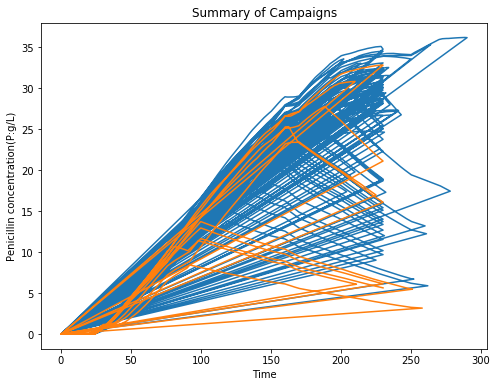

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
bp = Variable_data.groupby('Batch reference(Batch_ref:Batch ref)').plot(x = 'Time (h)', y = Variable_plot_selection.value,   ax=ax, legend = False, )
ax.set_title('Summary of Campaigns')
ax.set_xlabel('Time')
ax.set_ylabel(Variable_plot_selection.value)

In [21]:
Raman_spectra_batch_id.shape

(113935, 2202)

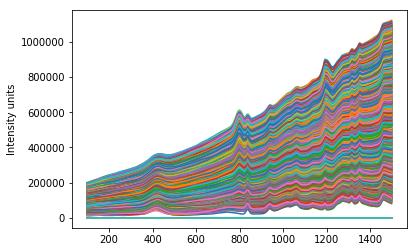

In [93]:
Intensity = Raman_spectra.iloc[100:1208, 100:1500]
x_wave = Raman_spectra.index[100:1500]
Temp = Intensity.transpose()
import matplotlib.pyplot as plt
plt.plot(x_wave,Temp)
plt.ylabel('Intensity units')
plt.show()
